# Exploratory Data Analysis

### Topic_1-2. Disney+ Movies and TV Shows

#### By. Gukhwan Hyun

About this Dataset: 
  * Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.

  [link](https://www.kaggle.com/shivamb/disney-movies-and-tv-shows)

# Import Dataset

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle    
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download shivamb/disney-movies-and-tv-shows
! unzip disney-movies-and-tv-shows.zip

Archive:  disney-movies-and-tv-shows.zip
  inflating: disney_plus_titles.csv  


# Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno

# Load the dataset

In [ ]:
dataset = pd.read_csv('/content/disney_plus_titles.csv')
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


# Preprocessing

In [ ]:
disney = dataset.copy()
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


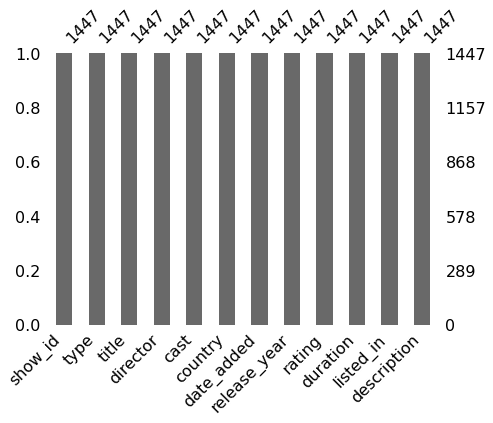

In [ ]:
missingno.bar(disney, figsize=(7,5));

## Handling missing values

In [ ]:
disney.director.fillna('Not Available', inplace=True)
disney.cast.fillna('Not Available', inplace=True)
disney.country.fillna('Not Available', inplace=True)
disney.dropna(subset=['date_added'], inplace=True)
disney.rating.fillna('Not Available', inplace=True)

In [ ]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1447 non-null   object        
 1   type          1447 non-null   object        
 2   title         1447 non-null   object        
 3   director      1447 non-null   object        
 4   cast          1447 non-null   object        
 5   country       1447 non-null   object        
 6   date_added    1447 non-null   datetime64[ns]
 7   release_year  1447 non-null   int64         
 8   rating        1447 non-null   object        
 9   duration      1447 non-null   object        
 10  listed_in     1447 non-null   object        
 11  description   1447 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 147.0+ KB


## Data Inspections

In [ ]:
disney.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
col_names = disney.columns

for col in col_names:
  if col not in ['show_id', 'title', 'date_added', 'release_year', 'description']:
    print(col, disney[col].value_counts(), sep='\n')
    print('-'*100)

type
Movie      1052
TV Show     395
Name: type, dtype: int64
----------------------------------------------------------------------------------------------------
director
Not Available                      470
Jack Hannah                         17
John Lasseter                       16
Paul Hoen                           16
Charles Nichols                     12
                                  ... 
Matthew Aeberhard, Leander Ward      1
Fletcher Markle                      1
Valerie LaPointe                     1
Robert Nixon                         1
Clayton Cogswell                     1
Name: director, Length: 610, dtype: int64
----------------------------------------------------------------------------------------------------
cast
Not Available                                                                                        190
Winston Hibler                                                                                        10
Dan Nachtrab                             

From the output above, we can see that director, cast, country, listed_in columns needs to be parsed

In [ ]:
disney.describe()

,release_year,date_added_year,date_added_month,date_added_day
count,1447.000000,1447.000000,1447.000000,1447.000000
mean,2003.071873,2019.699378,8.891500,12.823773
std,21.877923,0.816594,3.185588,6.691382
min,1928.000000,2019.000000,1.000000,1.000000
25%,1999.000000,2019.000000,7.000000,12.000000
50%,2011.000000,2019.000000,11.000000,12.000000
75%,2018.000000,2020.000000,11.000000,13.000000
max,2021.000000,2021.000000,12.000000,31.000000


## Parsing
  * director
  * cast
  * country
  * listed_in
  * date_added : datetime parse

### "date_added"

In [ ]:
disney['date_added'] = pd.to_datetime(disney['date_added'].str.strip(), format="%B %d, %Y")
disney['date_added'].dtype

dtype('<M8[ns]')

In [ ]:
disney["date_added_year"] = disney['date_added'].dt.year
disney["date_added_month"] = disney['date_added'].dt.month 
disney["date_added_day"] = disney['date_added'].dt.day

### Create a Parsing function

In [ ]:
# parse_cols = ['director','cast','country','listed_in']
# print(disney['director'][:10],
#       disney['director'].str.split(",")[:10],
#       disney['director'].str.split(",", expand=True)[:10],
#       sep='\n'*2)

In [ ]:
def col_data_parser(col):
  disney_cpy = disney.copy()
  col_upper = col.upper()
  
  col_count = pd.concat([disney_cpy, disney[col].str.split(",", expand=True)], axis=1)
  
  col_count = col_count.melt(id_vars=['type', 'title'], 
                            value_vars=range(len(disney[col].str.split(",", expand=True).columns)), 
                            value_name=col_upper)
  
  col_count = col_count[col_count[col_upper].notna()]
  col_count[col_upper] = col_count[col_upper].str.strip()
  col_count.drop(columns='variable', inplace=True)
  
  return col_count

In [ ]:
print(col_data_parser('director'),
      col_data_parser('cast'),
      col_data_parser('country'),
      col_data_parser('listed_in'), 
      sep='\n'*2)

         type  ...              DIRECTOR
0       Movie  ...  Alonso Ramirez Ramos
1       Movie  ...           John Cherry
2       Movie  ...          Karen Disher
3       Movie  ...       Hamish Hamilton
4     TV Show  ...         Not Available
...       ...  ...                   ...
4169    Movie  ...          Richard Rich
4221    Movie  ...           Art Stevens
4241    Movie  ...           Jack Kinney
4303    Movie  ...        Jamie Mitchell
4330    Movie  ...         Dave Michener

[1591 rows x 3 columns]

         type  ...                   CAST
0       Movie  ...   Chris Diamantopoulos
1       Movie  ...             Jim Varney
2       Movie  ...  Raymond Albert Romano
3       Movie  ...           Darren Criss
4     TV Show  ...            John Lennon
...       ...  ...                    ...
8677    Movie  ...           Kevin Durand
8678    Movie  ...           Alain Chabat
8679    Movie  ...          Taron Egerton
8680    Movie  ...          Shaznay Lewis
8961    Movie  ...  

In [ ]:
director_df = col_data_parser('director')
cast_df = col_data_parser('cast')
country_df = col_data_parser('country')
genre_df = col_data_parser('listed_in')

In [ ]:
director_df.shape, cast_df.shape, country_df.shape, genre_df.shape

((1591, 3), (6074, 3), (1744, 3), (3902, 3))

# EDA

## Visualization / Searching for Insight



### Release year
More contents from btw 1930 and 1980
  * Disney has been making video contents far longer than Netflix
    * Better if we know studio info

In [ ]:
fig = px.histogram(disney, x="release_year")
fig.update_layout(bargap=0.2)
fig.show();

### Date added
Disney definitely added majority of contents before launching the service 
  * Disney + launch date : November 12, 2019

In [ ]:
fig = px.histogram(disney, x="date_added")
fig.update_layout(bargap=0.3)
fig.show();

### Time-wise
Contents added the most on: 
* Day 12
* November
* 2019

why? 
  * Disney + launch date is November 12, 2019


In [ ]:
t = ["date_added_day", "date_added_month", "date_added_year"]
for i in t:
  print(i) 
  fig = px.histogram(disney, x=i)
  fig.update_layout(bargap=0.3)
  fig.show();
  print()

date_added_day



date_added_month



date_added_year


### Most common director


In [ ]:
director_df['DIRECTOR'].value_counts()[1:11]

Jack Hannah         17
Wilfred Jackson     16
Paul Hoen           16
John Lasseter       16
Robert Stevenson    13
Clyde Geronimi      13
Jack Kinney         12
Charles Nichols     12
James Algar         11
Bob Peterson        10
Name: DIRECTOR, dtype: int64

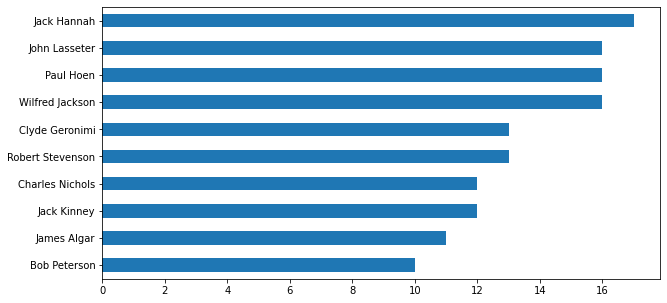

In [ ]:
# Top 10
fig = plt.figure(figsize=(10,5))
director_df['DIRECTOR'].value_counts()[1:11].sort_values().plot(kind='barh');

### Most common cast

In [ ]:
cast_df['CAST'].value_counts()

Not Available          190
Jim Cummings            33
Walt Disney             20
Larry the Cable Guy     19
Bill Farmer             18
                      ... 
Natasha Richardson       1
Alyson Reed              1
Max Kennedy              1
Kingston Foster          1
Bianca Collins           1
Name: CAST, Length: 3743, dtype: int64

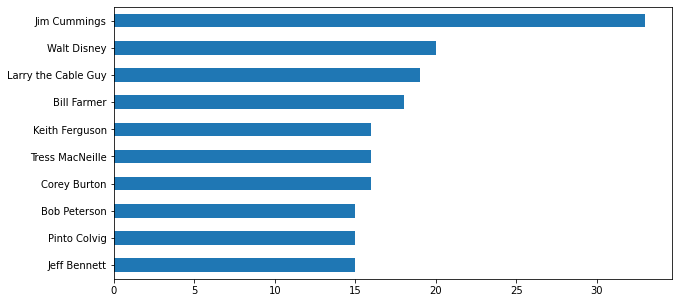

In [ ]:
# Top 10
fig = plt.figure(figsize=(10,5))
cast_df['CAST'].value_counts()[1:11].sort_values().plot(kind='barh');

### Most producing country

In [ ]:
country_df['COUNTRY'].value_counts()

United States           1182
Not Available            219
United Kingdom           101
Canada                    76
Australia                 23
France                    22
South Korea               13
Japan                     10
China                     10
Germany                    9
Ireland                    8
Taiwan                     6
India                      5
Mexico                     4
Hong Kong                  4
Spain                      4
Denmark                    3
South Africa               3
New Zealand                3
Argentina                  3
Hungary                    3
Poland                     2
Philippines                2
Malaysia                   2
Austria                    2
United Arab Emirates       2
Singapore                  2
Syria                      1
Russia                     1
Angola                     1
Kazakhstan                 1
Brazil                     1
Luxembourg                 1
Panama                     1
Switzerland   

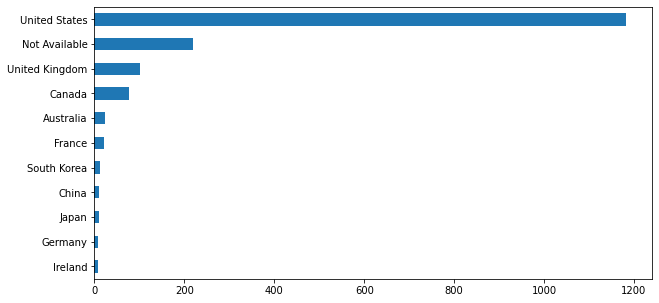

In [ ]:
# Top 10
fig = plt.figure(figsize=(10,5))
country_df['COUNTRY'].value_counts()[:11].sort_values().plot(kind='barh');

### Most common genre

In [ ]:
genre_df['LISTED_IN'].value_counts()

Family                     632
Animation                  542
Comedy                     524
Action-Adventure           450
Animals & Nature           208
Coming of Age              204
Fantasy                    192
Documentary                174
Kids                       140
Drama                      134
Docuseries                 122
Science Fiction             90
Historical                  53
Music                       47
Musical                     44
Sports                      43
Biographical                41
Buddy                       40
Anthology                   28
Reality                     26
Romance                     20
Superhero                   19
Crime                       16
Variety                     12
Mystery                     12
Game Show / Competition     10
Survival                     9
Parody                       9
Lifestyle                    8
Western                      7
Concert Film                 7
Medical                      6
Dance   

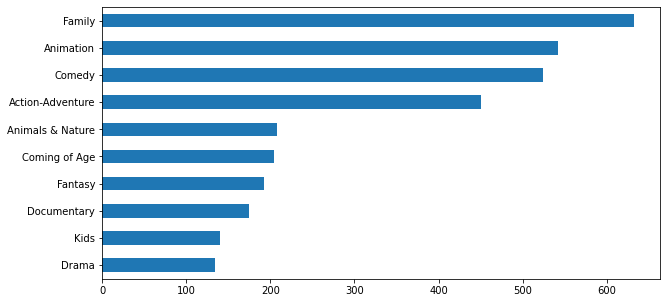

In [ ]:
# Top 10
fig = plt.figure(figsize=(10,5))
genre_df['LISTED_IN'].value_counts()[:10].sort_values().plot(kind='barh');

### Types of contents

In [ ]:
disney.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_year', 'date_added_month', 'date_added_day'],
      dtype='object')

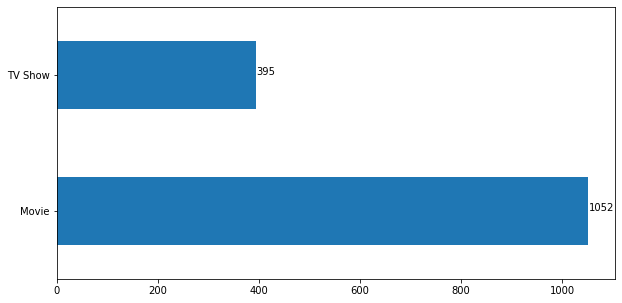

In [ ]:
fig = plt.figure(figsize=(10,5))
disney['type'].value_counts().plot(kind='barh')
for index, value in enumerate(disney['type'].value_counts().values):
    plt.text(value, index, str(value))

#### Country-wise

In [ ]:
fig = px.histogram(country_df, x="COUNTRY", color='type')
fig.update_layout(bargap=0.3)
fig.show();

In [ ]:
country_df[country_df['COUNTRY'] == 'South Korea']

,type,title,COUNTRY
203,TV Show,MUPPET BABIES,South Korea
1498,TV Show,Disney Amphibia,South Korea
1554,TV Show,Miraculous: Tales Of Ladybug & Cat Noir,South Korea
1664,TV Show,Big City Greens,South Korea
1706,TV Show,Higglytown Heroes,South Korea
2143,TV Show,Sheriff Callie's Wild West,South Korea
2543,Movie,Mulan II,South Korea
2572,TV Show,Phineas and Ferb,South Korea
3118,TV Show,Special Agent Oso,South Korea
3651,TV Show,Bonkers,South Korea


### Most common rating

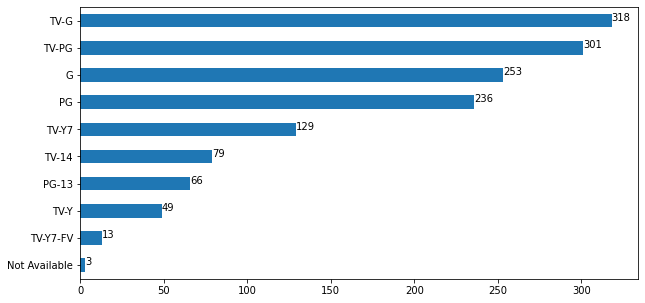

In [ ]:
fig = plt.figure(figsize=(10,5))
disney['rating'].value_counts().sort_values().plot(kind='barh')
for index, value in enumerate(disney['rating'].value_counts().sort_values().values):
    plt.text(value, index, str(value));

### Duration distributions

In [ ]:
disney['duration'].value_counts()

1 Season     219
2 Seasons     81
3 Seasons     43
44 min        42
7 min         42
            ... 
162 min        1
169 min        1
148 min        1
136 min        1
130 min        1
Name: duration, Length: 158, dtype: int64

In [ ]:
season_duration = disney['duration'][disney['duration'].str.contains('Season')].value_counts()
season_duration

1 Season      219
2 Seasons      81
3 Seasons      43
4 Seasons      24
5 Seasons      11
7 Seasons       5
6 Seasons       3
9 Seasons       2
8 Seasons       2
10 Seasons      2
19 Seasons      1
16 Seasons      1
32 Seasons      1
Name: duration, dtype: int64

In [ ]:
print(np.sum(season_duration.values, axis=0))
219 / 395

395


0.5544303797468354

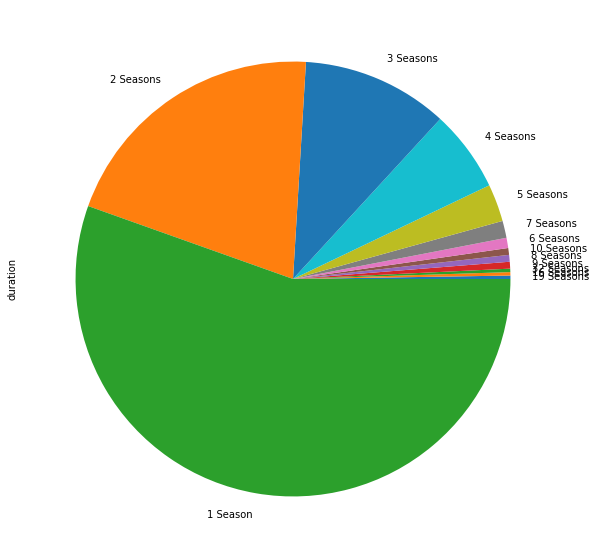

In [ ]:
fig = plt.figure(figsize=(15,10))
season_duration.sort_values().plot(kind='pie');

In [ ]:
time_duration = disney['duration'][disney['duration'].str.contains('min')].value_counts()
time_duration

44 min     42
7 min      42
8 min      41
9 min      33
45 min     31
           ..
136 min     1
68 min      1
20 min      1
182 min     1
130 min     1
Name: duration, Length: 145, dtype: int64

### Persona
* Most common directors' persona?

In [ ]:
def find_persona(director_name):
  actors =[]
  persona = pd.merge(director_df, cast_df, how='left', on='title')
  for actor in persona[persona['DIRECTOR'] == director_name]['CAST'].values:
    if actor != 'Not Available':
      actors.append(actor)
  return pd.Series(actors).value_counts()

In [ ]:
top10directors = ['Jack Hannah', 
                  'Wilfred Jackson', 
                  'Paul Hoen', 
                  'John Lasseter', 
                  'Robert Stevenson', 
                  'Clyde Geronimi', 
                  'Jack Kinney', 
                  'Charles Nichols', 
                  'James Algar',
                  'Bob Peterson']

In [ ]:
for dic in top10directors:
  print('Director = ', dic) 
  print('Actors = ', find_persona(dic), sep='\n')
  print()

Director =  Jack Hannah
Actors = 
Sterling Holloway    1
Ruth Clifford        1
Jimmy MacDonald      1
Dessie Miller        1
Pinto Colvig         1
Clarence Nash        1
dtype: int64

Director =  Wilfred Jackson
Actors = 
Walt Disney          3
Clarence Nash        2
Verna Felton         2
Heather Angel        1
Richard Haydn        1
Bobby Driscoll       1
Sterling Holloway    1
Marcelite Garner     1
Ilene Woods          1
Luis Van Rooten      1
Pat O'Malley         1
Paul Collins         1
Kathryn Beaumont     1
Bill Thompson        1
Winston Hibler       1
Eleanor Audley       1
Hans Conried         1
Florence Gill        1
Sonny Dawson         1
Rhoda Williams       1
James MacDonald      1
Ed Wynn              1
Jerry Colonna        1
dtype: int64

Director =  Paul Hoen
Actors = 
Kylee Russell          3
Milo Manheim           2
Meg Donnelly           2
Alex Désert            2
Carla Jeffery          2
                      ..
Noah Centineo          1
Yani Gellman           1
P

### Most common genres per country

In [ ]:
def find_popular_genre_cty(country_name):
  genres = []
  genre_country = pd.merge(country_df, genre_df, how='left', on='title')
  for genre in genre_country[genre_country['COUNTRY'] == country_name]['LISTED_IN'].values:
    if genre != 'Not Available':
      genres.append(genre)
  return pd.Series(genres).value_counts()

In [ ]:
find_popular_genre_cty('United States')

In [ ]:
find_popular_genre_cty('South Korea')

Animation           13
Action-Adventure     7
Kids                 6
Comedy               6
Family               2
Fantasy              2
Western              1
Musical              1
dtype: int64

### Most common actors per country

In [ ]:
def find_popular_actor_cty(country_name):
  actors = []
  actor_country = pd.merge(country_df, cast_df, how='left', on='title')
  for actor in actor_country[actor_country['COUNTRY'] == country_name]['CAST'].values:
    if actor != 'Not Available':
      actors.append(actor)
  return pd.Series(actors).value_counts()

In [ ]:
find_popular_actor_cty('United States')

Jim Cummings           31
Walt Disney            20
Larry the Cable Guy    18
Keith Ferguson         16
Bob Peterson           15
                       ..
Rachel Brosnahan        1
Andy Casagrande         1
Donna Pescow            1
Mark Gatiss             1
Madison Iseman          1
Length: 3384, dtype: int64

In [ ]:
find_popular_actor_cty('South Korea')

Corey Burton        2
Jim Cummings        2
Kari Wahlgren       1
Mela Lee            1
Amanda Leighton     1
                   ..
Melanie Harrison    1
Justin Felbinger    1
Chris Houghton      1
Vincent Martella    1
Carrie Keranen      1
Length: 63, dtype: int64

### Most common directors per genre

In [ ]:
def find_popular_director_gen(genre_name):
  directors = []
  director_genre = pd.merge(genre_df, director_df, how='left', on='title')
  for director in director_genre[director_genre['LISTED_IN'] == genre_name]['DIRECTOR'].values:
    if director != 'Not Available':
      directors.append(director)
  return pd.Series(directors).value_counts()

In [ ]:
find_popular_director_gen('Family')

Jack Hannah          17
Wilfred Jackson      16
John Lasseter        14
Robert Stevenson     12
Clyde Geronimi       12
                     ..
Steve Boyum           1
Dave Michener         1
Cameron Crowe         1
Kathleen Marshall     1
Domee Shi             1
Length: 328, dtype: int64

In [ ]:
find_popular_director_gen('Fantasy')

Robert Stevenson          6
Stuart Gillard            5
Robert Vince              4
Kenny Ortega              4
Stevie Wermers-Skelton    4
                         ..
Andrew Stanton            1
Samuel Armstrong          1
Ron Howard                1
Tom Caulfield             1
Domee Shi                 1
Length: 132, dtype: int64

In [ ]:
find_popular_director_gen('Action-Adventure')

Wolfgang Reitherman    5
Bradley Raymond        5
Michael Hegner         5
Andrew Stanton         4
Anthony Russo          4
                      ..
Eric Goldberg          1
Stanley Tong           1
Richard Fleischer      1
Matthew Vaughn         1
Josh Cooley            1
Length: 244, dtype: int64

### Most common actors per genre

In [ ]:
def find_popular_actor_gen(genre_name):
  actors = []
  actor_genre = pd.merge(genre_df, cast_df, how='left', on='title')
  for actor in actor_genre[actor_genre['LISTED_IN'] == genre_name]['CAST'].values:
    if actor != 'Not Available':
      actors.append(actor)
  return pd.Series(actors).value_counts()

In [ ]:
find_popular_actor_gen('Family')

Larry the Cable Guy    18
Walt Disney            18
Pinto Colvig           15
Bob Peterson           14
Keith Ferguson         13
                       ..
Duncan Macrae           1
Dara McGarry            1
Kiersey Clemons         1
Bella Thorne            1
August Schellenberg     1
Length: 1766, dtype: int64

In [ ]:
find_popular_actor_gen('Fantasy')

Johnny Depp        6
Raven-Symoné       6
Chris Hemsworth    6
Mae Whitman        5
Lucy Liu           5
                  ..
Eddie Albert       1
Meryl Streep       1
Sahar Biniaz       1
June Foray         1
Hallie Todd        1
Length: 815, dtype: int64

In [ ]:
find_popular_actor_gen('Action-Adventure')

Jim Cummings          17
Anthony Daniels       10
Trevor Devall         10
Dee Baker              9
Scarlett Johansson     9
                      ..
Julie Sommars          1
Zhong Yu               1
Michael Sundin         1
Barry Bostwick         1
Alyssa Milano          1
Length: 1673, dtype: int64

### Most demanding actor, director in last 5 years



In [ ]:
def col_data_parser2(col):
  disney_cpy = disney.copy()
  col_upper = col.upper()
  
  col_count = pd.concat([disney_cpy, disney[col].str.split(",", expand=True)], axis=1)
  
  col_count = col_count.melt(id_vars=['type', 'title','release_year'], 
                            value_vars=range(len(disney[col].str.split(",", expand=True).columns)), 
                            value_name=col_upper)
  
  col_count = col_count[col_count[col_upper].notna()]
  col_count[col_upper] = col_count[col_upper].str.strip()
  col_count.drop(columns='variable', inplace=True)
  
  return col_count

In [ ]:
year_director = col_data_parser2('director')
year_actor = col_data_parser2('cast')

In [ ]:
year_director[year_director['release_year'] == 2021]['DIRECTOR'].value_counts()[1:11]

In [ ]:
year_director[(year_director['release_year'] == 2021) |
           (year_director['release_year'] == 2020) |
           (year_director['release_year'] == 2019) |
           (year_director['release_year'] == 2018) |
           (year_director['release_year'] == 2017)]['DIRECTOR'].value_counts()[1:11]

Bob Peterson           10
David Silverman         4
Mark Woodward           3
Kentaro Takayanagi      3
Jeff Wilson             2
Sophie Harris           2
Keith Scholey           2
Darren Foster           2
Alastair Fothergill     2
Katie Bauer Murdock     2
Name: DIRECTOR, dtype: int64

In [ ]:
year_actor[(year_actor['release_year'] == 2021) |
           (year_actor['release_year'] == 2020) |
           (year_actor['release_year'] == 2019) |
           (year_actor['release_year'] == 2018) |
           (year_actor['release_year'] == 2017)]['CAST'].value_counts()[1:11]

Tony Hale           13
Bill Farmer         11
Bob Peterson        10
Dove Cameron         8
Tress MacNeille      8
Dee Baker            8
Dan Nachtrab         7
Josh Gad             7
Kathreen Khavari     6
Jonathan Groff       5
Name: CAST, dtype: int64

In [ ]:
year_actor[year_actor.release_year.isin([yr for yr in range(2017,2022)])]['CAST'].value_counts()[1:12]